In [1]:
# Importing Libraries
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# Load the boston dataset from sklearn.datasets
boston_data = load_boston()
# Enter the boston data into a dataframe
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# Print the first 5 rows to confirm ran correctly
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## SCATTER PLOTS:
Scatter plots are great for plotting two variables to visualize how they might correlate and what relationship there might be between the variables.
In this plot, we see a positive relationship between Height and Diameter. It is easy to see that relationship in a scatter plot by looking for points that are close to the 45-degree line pointing up and to the right.

Seaborn makes it easy to create scatter plots using the lmplot() function. The key inputs are:

* x which is the column name for your x-axis variable
* y which is the column name for your y-axis variable
* data which is your Pandas dataframe

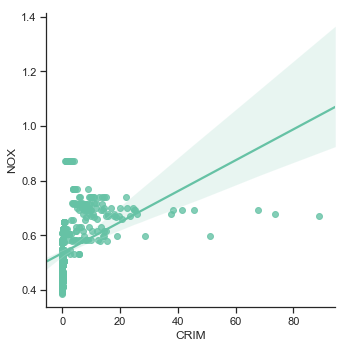

In [2]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

# Create the scatter plot
sns.lmplot(x="CRIM", y="NOX", data=boston_df)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

By default, it plots a regression line so you can see potential linear relationships more easily. Our variables appear to be somewhat positively correlated. The lighter shade around the line is the 95% confidence interval for our regression line and is calculated using bootstraps of our data.

# BAR PLOTS:
Bar plots can be useful when comparing categories. For example, the bar plot below compares the capital gain values across gender.
The bar plot allows us to easily see the difference in mean capital gain tax across genders for this dataset.

We can create this bar plot using the barplot() command in Seaborn.

* The first argument to the command is the column to be used for the groups. In the plot above, gender.
* The second argument is the column to be used for comparison. In the plot above, capital gain.

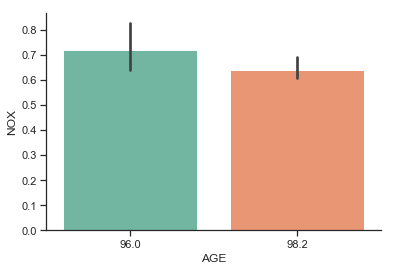

In [3]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

# Only keep for ages 96 and 98.2
boston_df = boston_df[boston_df["AGE"].isin([96, 98.2])]

# Create the bar plot
sns.barplot(boston_df['AGE'], boston_df['NOX'])
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

## DISTRIBUTIONS:
A probability distribution is a mathematical function that provides the probabilities of the occurrence of different possible outcomes.

For example, you might have a program that returns 1 with a 50% probability and 0 with a 50% probability. Thus, 50% of your probability distribution would be assigned to 1 and 50% to 0.
If you were to plot this expected distribution, you would have two bars of equal height for 1 and 0.

Seaborn has a few ways to plot distributions:

* Histograms
* Box plots
* Violin plots
* Joint plots


# 1.Histograms::
A histogram is an estimate of the probability distribution of a continuous variable. To construct a histogram, the first step is to bin the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.

You create a histogram with the distplot() function is Seaborn. You only need to pass one argument which is the continuous variable for which you would like to construct a histogram.

Histograms, though, have a very important parameter - the number of bins. You specify the number of bins with the bin parameter. If unspecified, Seaborn tries to find a useful number of bins to use. It is important to remember, though that the more bins, the higher variance your plot will have; the fewer bins, the more bias. Be thoughtful when choosing the number of bins as it might change the way you view your data.

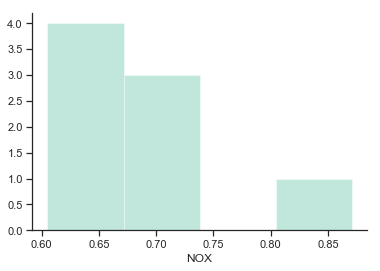

In [4]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

# Create the histogram plot
sns.distplot(boston_df.NOX, kde=False)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

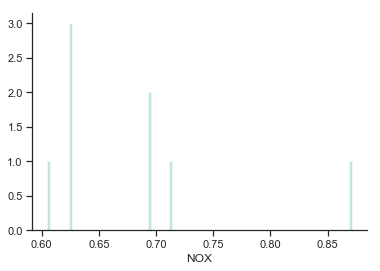

In [5]:
# Create the histogram plot with bins=100
sns.distplot(boston_df.NOX, bins=100, kde=False)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

You can see the increased variance by increasing the number of bins.

You will notice we have been setting kde=False. With this equal to True, it plots the shape of the distribution.

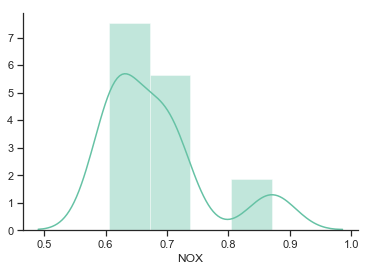

In [6]:
# Create the histogram plot with KDE=TRUE
sns.distplot(boston_df.NOX, kde=True)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

# 2.Box plot::
Seaborn also has a boxplot() function. A box plot is a graphical view of summary statistics from a distribution.
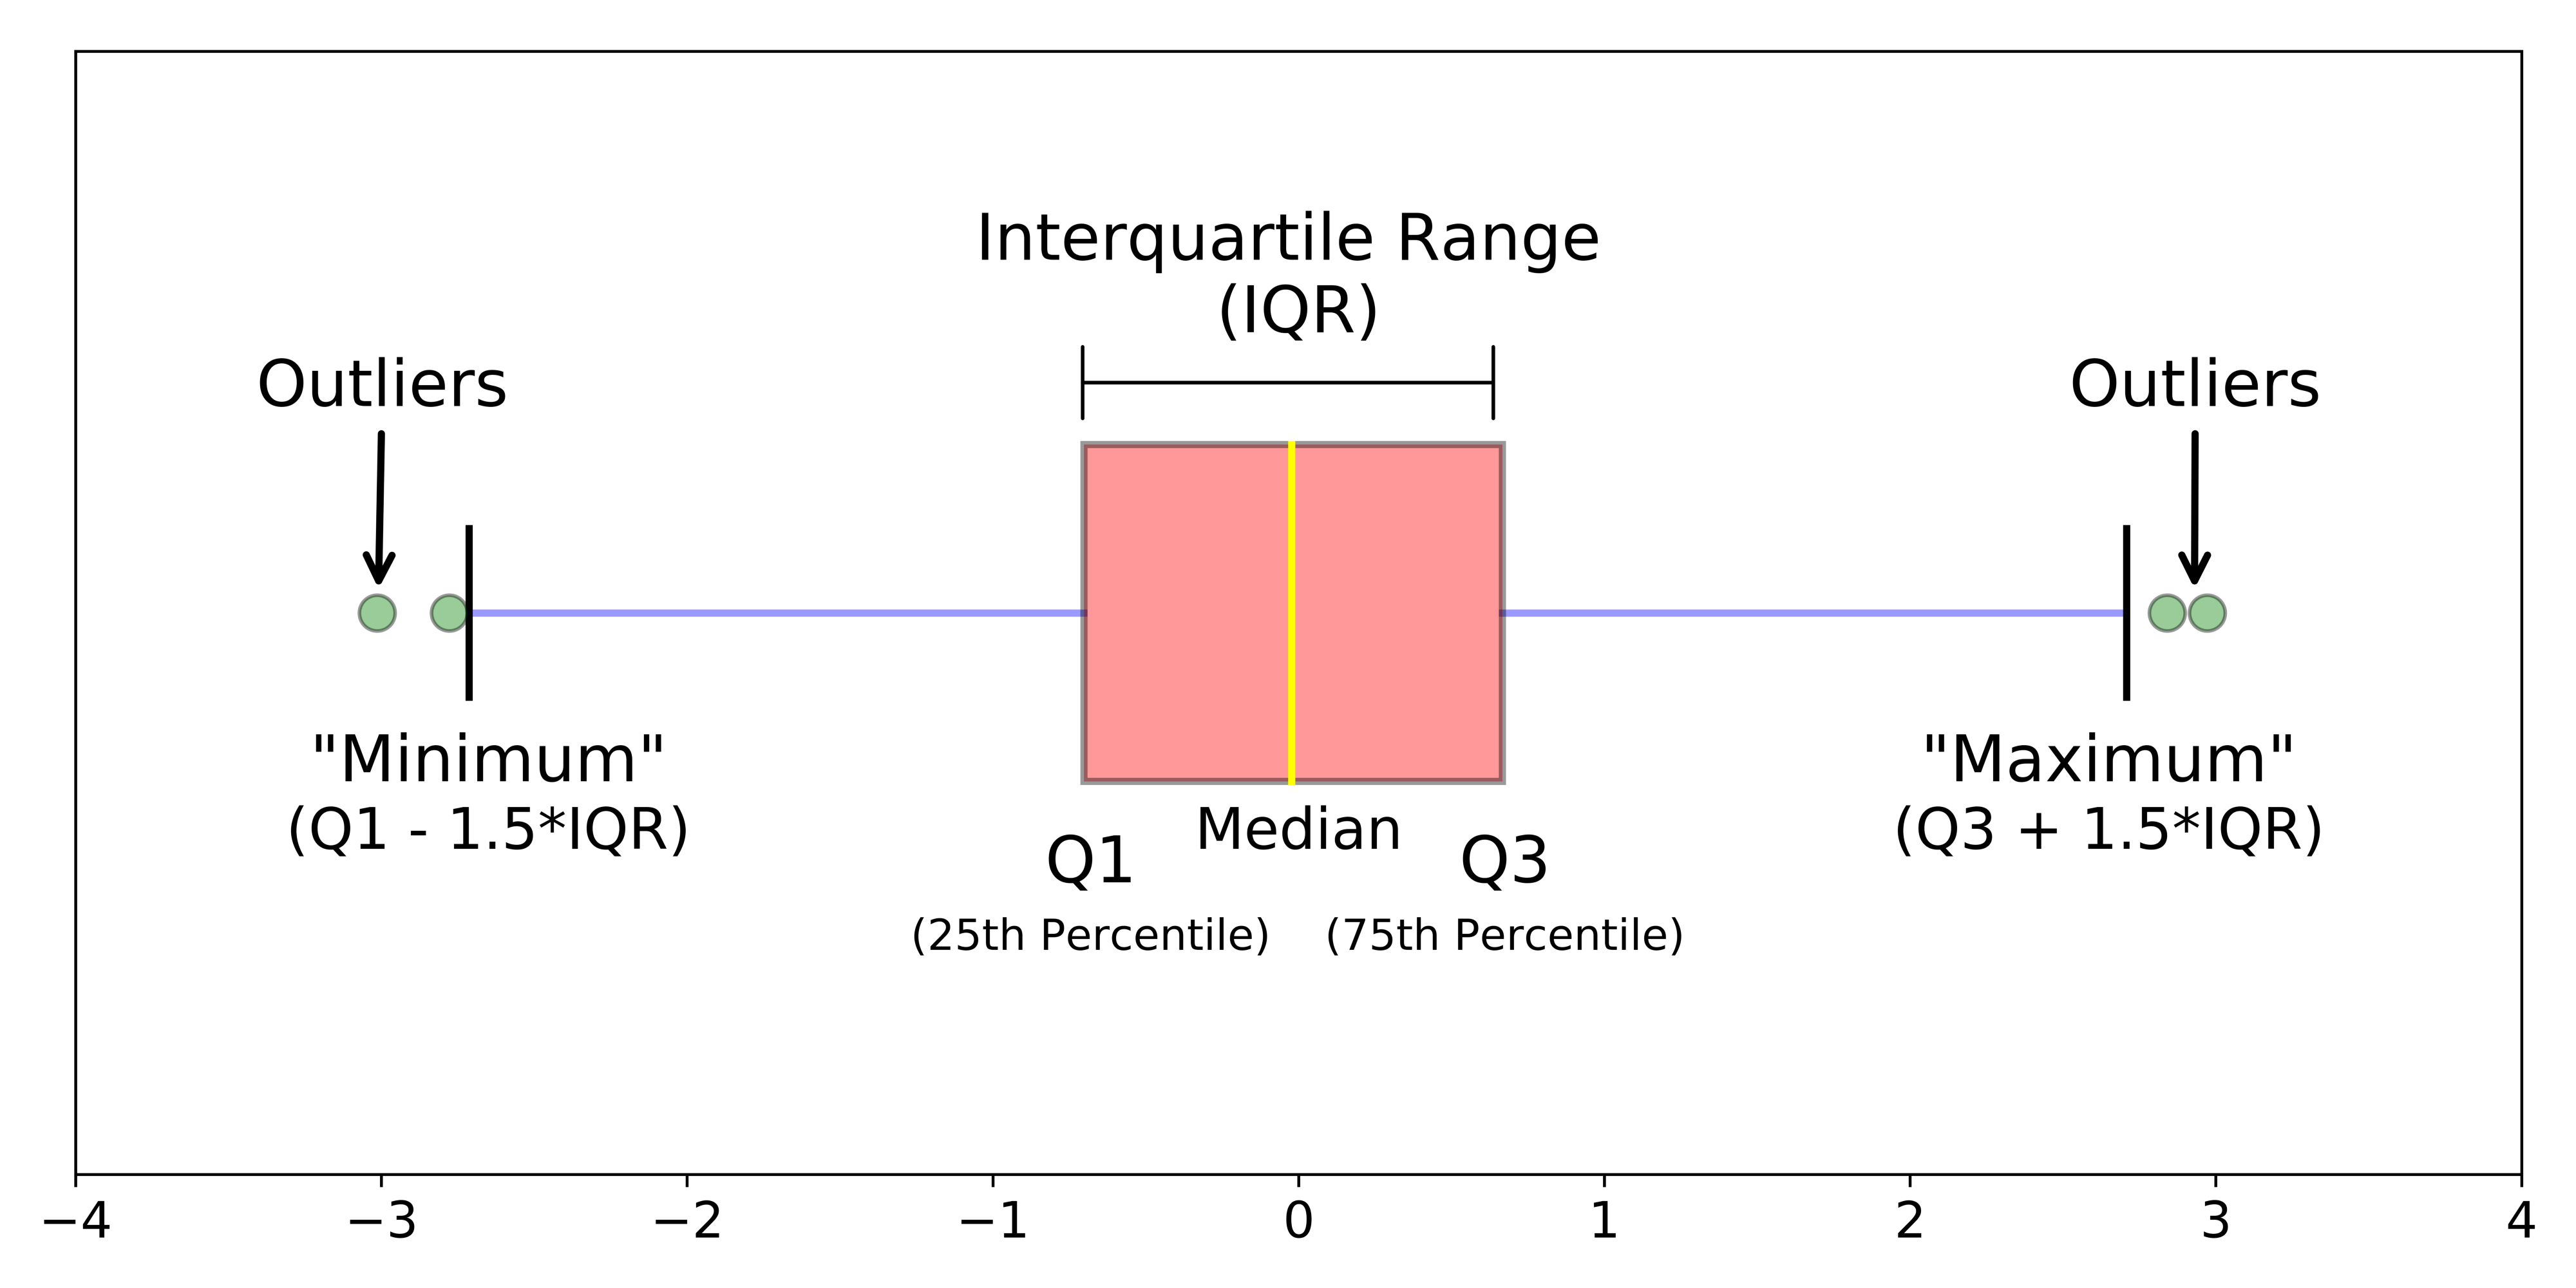

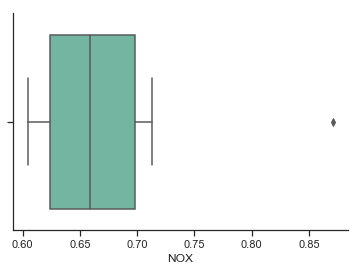

In [7]:
# Create the box plot
sns.boxplot(boston_df.NOX)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

# 3.Violin plot::
Seaborn has a plot very similar to a box plot called a violin plot. With this plot you have removed the box part of the box plot and replaced it with the kde curve we saw from the distplot() function. This can be valuable as it allows you to see the modality of your distribution. For example, below we see that INDUS is bi-modal. In a box plot, we would not have seen that distinction.

You create a violin plot using the violinplot() function in Seaborn. You just pass it a dataframe and it will create a violin plot for each column in your dataframe.
I prefer my plots vertically oriented, so I often use the orient parameter with a value of “v” to do so.

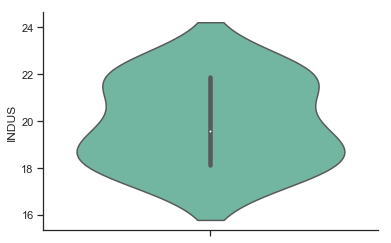

In [8]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

# Create the violin plot
sns.violinplot(boston_df['INDUS'], orient="v")
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

# 4.Joint plot::
Lastly, joint plots can plot the histogram of two variables on one plot and also show the scatter plot in the middle. In the top right, you also get the Pearson correlation coefficient between the variables as well as the p-value.

This is done with the jointplot() function from Seaborn.
The first parameter is the variable you would like on the x-axis. The second parameter is the variable you would like on the y-axis.
You can also use the kind parameter to change how the scatter points are visualized. I like passing a value of “hex”.

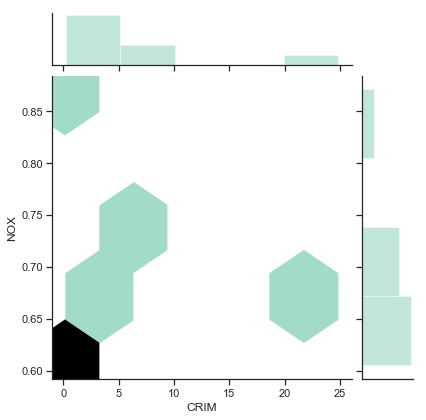

In [9]:
# Create the violin plot
sns.jointplot(boston_df.CRIM, boston_df.NOX, kind="hex")
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

## LINE PLOTS:: 
Line graphs are very useful for showing a value over time, such as a stock’s price. Typically, one would use a line graph over a scatter plot if there is a connecting component between the values, such as time.

The lineplot() function of Seaborn is what plots the line graph. The first parameter is the list or array of x-values and the second parameter is the array of y-values.
That’s it! Line graphs are simple to implement and can be very effective.

Let’s take a look at an example using the flight dataset from Seaborn. This dataset has three columns. Year, Month, and Passengers. The passengers column represents the number of flight passengers for that year and month.

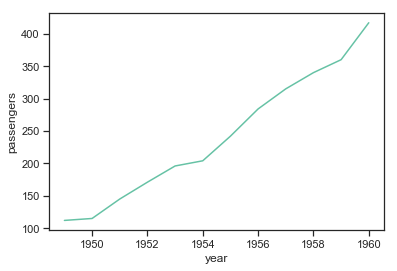

In [10]:
flights_long=sns.load_dataset("flights")   # importing flight dataset
 
# filtering the dataset to obtain the January records for all years
flights_long=flights_long[flights_long.month == 'January']

#plotting a line graph
plot=sns.lineplot(flights_long.year, flights_long.passengers)

## HEAT MAPS::
Heat maps are a plotted data matrix where each value in the matrix is a category.
You can create heat maps in Python by using the heatmap() function from Seaborn. Some of the core parameters:

* data - the first parameter and is your matrix of data represented as a Panda’s dataframe.
* annot - if True will plot the actual data values in each cell.
* fmt - lets you control the string formatting. A value of “d” uses a decimal integer.
* linewidths - lets you set the width of the lines which separate each cell.
* ax - allows you to pass a custom Matplotlib Axes.
* cmap - allows you to pick the colormap to use when plotting.

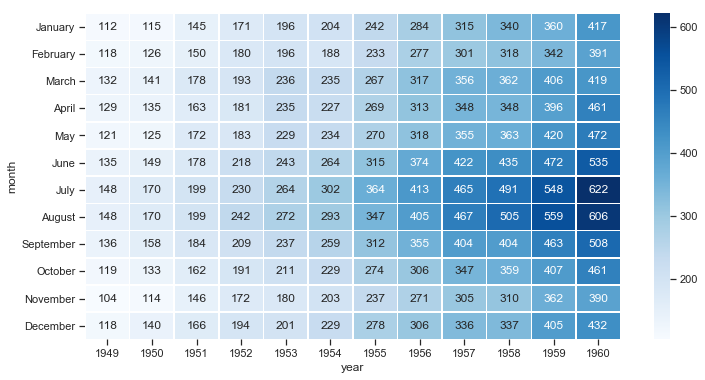

In [11]:
flights_long=sns.load_dataset("flights")
# Pivot the dataset from long to wide format
flights = flights_long.pivot("month", "year", "passengers")
# Create a larger figure size to plot on
f, ax = plt.subplots(figsize=(12, 6))
# Create the heat map
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Blues')

I like heat maps because the color on top of the values allows us to see the trends much easier. We can see over the years the number of passengers has increased, and that July and August are consistently the most popular months. There is a lot of value from a single plot.

That’s how the low and high values can be tracked down with heat maps.

## MULTI-PLOT GRIDS::
When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice” or “trellis” plotting, and it is related to the idea of “small multiples”. It allows a viewer to quickly extract a large amount of information about complex data. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.


# 1.FacetGrid and Map:
First, we will look at the FacetGrid() and map() combination in Seaborn.
The parameters we will use for FacetGrid are:

* data - the first parameter and specifies the dataframe to use.
* row - the column name from your dataframe you want to use as the rows of your grid.
* col - the column name from your dataframe you want to use as the columns of your grid.
* margin_titles - which if True, the titles for the row variable are drawn to the right of the last column.

The parameters we will use for map are:

* func - the first argument and is the plotting function you wish to use.
* args - the second parameter and is the column name for the variable you wish to plot.
* color - which allows you to specify the plot color.

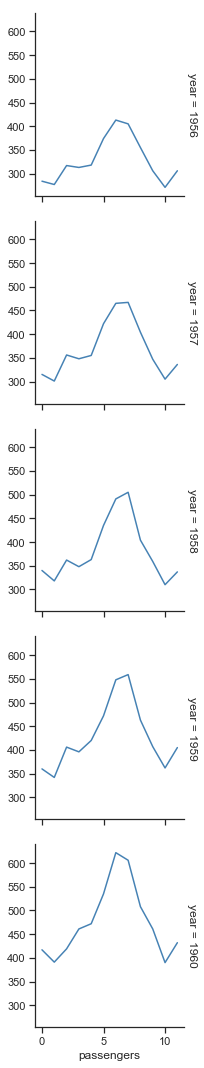

In [12]:
# Load dataset
flights = sns.load_dataset("flights")
# Subset the data to years >= 1956 to more easily fit on the plot
flights = flights[flights.year >= 1956]

g = sns.FacetGrid(flights, row="year", margin_titles=True)
g.map(plt.plot, "passengers", color="steelblue")

# 2.PairGrid:
Another common multi-plot function in Seaborn is PairGrid(). This function plots pairwise relationships in a grid. You generally pass one parameter which is a dataframe consisting of the columns you wish to plot.

You then call the map() function which maps the pairwise combinations of your columns onto the plot of your choice. The plotting function you wish to use is the parameter you pass to map()

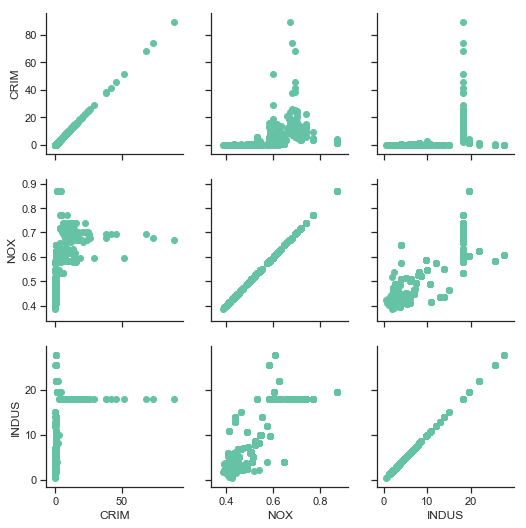

In [13]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

# Load data as explained in introductory lesson
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# Create and map the PairGrid
g = sns.PairGrid(boston_df[['CRIM', 'NOX', 'INDUS']])
g.map(plt.scatter);

# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()